# PROBLEM 1 
#### Write a program to implement Linear regression using Scikit learn.

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

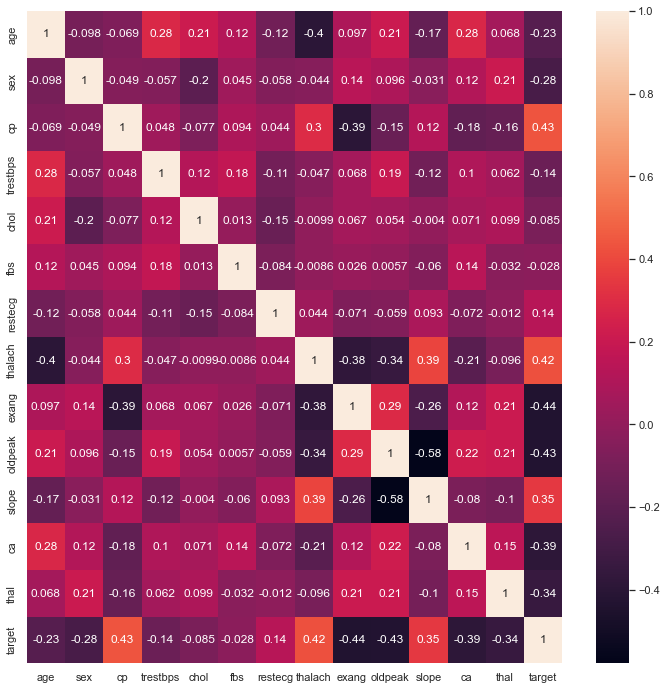

In [11]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(data.corr(),annot=True)

In [12]:
# we can see any two features are barely correlated 
# therefore we can consider all features for building model

In [13]:
X=data.iloc[:,:-2].to_numpy()
y=data.iloc[:,-1].to_numpy()

In [14]:
reg=LinearRegression()
reg.fit(X,y)
theta=reg.coef_
intercept=reg.intercept_

In [15]:
def getRMSError(theta,X,y,intercept):
    theta=theta.reshape((theta.shape[0],1))
    y_pred=np.matmul(X,theta)+intercept
    y_pred=y_pred.reshape(-1)
    cost=np.sqrt(np.mean((y-y_pred)**2))
    return cost

cost=getRMSError(theta,X,y,intercept)
print("RMS Error is {}".format(cost))

RMS Error is 0.352519195426465


# PROBLEM 2
##### Write a python program to implement Logistic Regression for binary classification from scratch using the following dataset

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
class BinaryLogisticReg:
    def __init__(self,s):
        self.theta=np.zeros(s+1)
        self.rms_arr=[]
        self.cost_arr=[]
        pass
    def AddOneRow(self,X):
        ones=np.ones((X.shape[0],1))
        X=np.concatenate((ones,X),axis=1)
        return X
    def sigmoid(self,X):
        return np.exp(X)/(1+np.exp(X))
    def getH(self,X):
        theta_temp=self.theta.reshape((self.theta.shape[0],1))
        z=np.matmul(X,theta_temp)
        h=self.sigmoid(z)
        h=h.reshape(-1)
        return h
    def predict(self,X):
        y_pred=self.getH(X)
        y_pred=np.where(y_pred>=0.5,1,0)
        return y_pred
    def getRMSError(self,X,y):
        theta_temp=self.theta.reshape((self.theta.shape[0],1))
        y_pred=np.matmul(X,theta_temp)
        y_pred=y_pred.reshape(-1)
        err=np.sqrt(np.mean((y-y_pred)**2))
        return err
    
    def getCost(self,X):
        y_pred=self.getH(X)
        cost=np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        return -cost
    
    def plotErr(self):
        fig=plt.figure(figsize=(5,5))
        epochs_arr=np.arange(len(self.rms_arr))
        plt.plot(epochs_arr,self.rms_arr)
        plt.xlabel("Number of Epochs")
        plt.ylabel("RMS ERROR")
        plt.title("RMS ERROR vs Number of Iterations")

    def plotCost(self):
        fig=plt.figure(figsize=(5,5))
        epochs_arr=np.arange(len(self.cost_arr))
        plt.plot(epochs_arr,self.cost_arr)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Cost")
        plt.title("Cost vs Number of Iterations")      
    
    def fit(self,X,y,alpha=0.000001,epochs=1000):
        h=self.getH(X)
        for i in range(epochs):
            for j in range(X.shape[1]):
                temp=h-y
                self.theta[j]=self.theta[j]-alpha*(1/X.shape[0])*np.dot(temp,X.T[j])
            h=self.getH(X)
            self.rms_arr.append(self.getRMSError(X,y))
            self.cost_arr.append(self.getCost(X))

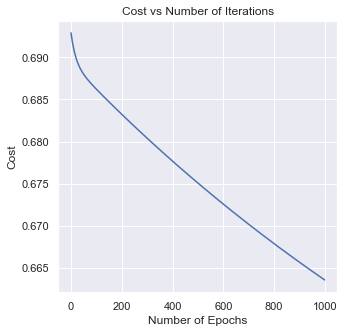

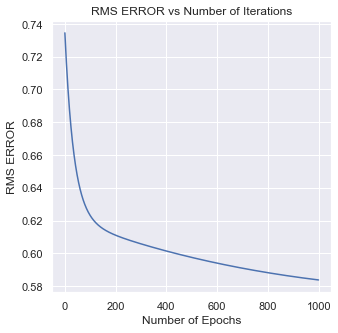

In [19]:
X=data.iloc[:,:-2].to_numpy()
y=data.iloc[:,-1].to_numpy()
logreg=BinaryLogisticReg(X.shape[1])
X=logreg.AddOneRow(X)
logreg.fit(X,y) # fitting model
logreg.plotCost()  # plotting cost with iterations
logreg.plotErr()   # plotting rms error with iterations

In [ ]:
print()